# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [13]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее', 'Два и более высших образования', 'Высшее', 'Неполное среднее', 'Ученая степень', 'Неоконченное высшее', 'Среднее специальное'}


MARITAL_STATUS
{'Разведен(а)', 'Состою в браке', 'Гражданский брак', 'Не состоял в браке', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Подбор персонала', 'Строительство', 'Туризм', 'Юридические услуги/нотариальные услуги', 'Банк/Финансы', 'Наука', 'Торговля', 'Сельское хозяйство', 'Недвижимость', 'Нефтегазовая промышленность', 'Транспорт', 'Информационные технологии', 'Коммунальное хоз-во/Дорожные службы', 'Сборочные производства', 'Государственная служба', 'Страхование', 'Логистика', 'ЧОП/Детективная д-ть', 'Информационные услуги', 'Другие сферы', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Здравоохранение', 'Развлечения/Искусство', 'Металлургия/Промышленность/Машиностроение', 'Маркетинг', 'Управляющая компания', 'Химия/Парфюмерия/Фармацевтика', 'Образование', 'Салоны красоты и здоровья', 'Ресторанный бизнес/Общественное питание'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [ ]:
# В данных есть пропуски. Пропуски есть в стобцах: GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR, 
#TP_PROVINCE, WORK_TIME,PREVIOUS_CARD_NUM_UTILIZED
# Можно удалить строки с пропущенными данными, заменить отсуствующие в них значения на средние значения этого столбца или 
# средние значения столбца по уточненным данным (напромер среднее значение для военных по контракту), или оставить 
# пока как есть, т.к. мы не знаем задачу. Я бы пока оставил как есть.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
Если в категориальном признаке небольшое количество данных, то можно заменить на числа, присвоив каждому признаку определенное 
число. Если много, то прежде чем присваивать числа лучше наверно обобщить, и потом при необходимости вновь доразбить на 
более мелкие классы внутри обобщенных более крупных частей данных.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [35]:
#допфункция приведения чисел к типу float
def numbers_to_float(df, column):
    return df[column].map(lambda x: x.replace(',', '.')).astype('float')


#допфункция замены пустых значения
def fill_na(column, df):
    most_freq_value = df[column.name].mode()[0]
    return df[column.name].fillna(most_freq_value)

#допфункция замены всех пустых
def fill_na_all(df):    
    return df.apply(fill_na, args=(df,))


def preproc_data(df_input):
    #df_output = df_input.copy()
    ## Your Code Here
    
    df_output = (df_input.copy()
                 # Удаляло идентификатор AGREEMENT_RK
                .drop('AGREEMENT_RK', axis=1)                 
                 # Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
                .assign(PERSONAL_INCOME = numbers_to_float(df, 'PERSONAL_INCOME'),
                        CREDIT = numbers_to_float(df, 'CREDIT'),
                        FST_PAYMENT = numbers_to_float(df, 'FST_PAYMENT'),
                        LOAN_AVG_DLQ_AMT = numbers_to_float(df, 'LOAN_AVG_DLQ_AMT'),
                        LOAN_MAX_DLQ_AMT = numbers_to_float(df, 'LOAN_MAX_DLQ_AMT'),
                )                 
                 # Что-то делала с пропусками
                .pipe(fill_na_all)
                 # Кодировала категориальные признаки
                .assign(EDUCATION = lambda x: x["EDUCATION"].astype('category').cat.codes,
                        MARITAL_STATUS = lambda x: x["MARITAL_STATUS"].astype('category').cat.codes,
                        GEN_INDUSTRY = lambda x: x["GEN_INDUSTRY"].astype('category').cat.codes,
                        GEN_TITLE = lambda x: x["GEN_TITLE"].astype('category').cat.codes,
                        ORG_TP_STATE = lambda x: x["ORG_TP_STATE"].astype('category').cat.codes,
                        ORG_TP_FCAPITAL = lambda x: x["ORG_TP_FCAPITAL"].astype('category').cat.codes,
                        JOB_DIR = lambda x: x["JOB_DIR"].astype('category').cat.codes,
                        REG_ADDRESS_PROVINCE = lambda x: x["REG_ADDRESS_PROVINCE"].astype('category').cat.codes,
                        FACT_ADDRESS_PROVINCE = lambda x: x["FACT_ADDRESS_PROVINCE"].astype('category').cat.codes,
                        POSTAL_ADDRESS_PROVINCE = lambda x: x["POSTAL_ADDRESS_PROVINCE"].astype('category').cat.codes,
                        TP_PROVINCE = lambda x: x["TP_PROVINCE"].astype('category').cat.codes,
                        REGION_NM = lambda x: x["REGION_NM"].astype('category').cat.codes,
                        FAMILY_INCOME = lambda x: x["FAMILY_INCOME"].astype('category').cat.codes,
                       )
    
    )        
    
    return df_output

In [37]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

df_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,30,1,0,1,1,1,5,2,13,...,1,2,2,8,0,0,0.0,0.0,1.0,test
1,0,48,0,1,1,0,0,4,4,23,...,0,2,1,15,0,0,0.0,0.0,1.0,test
2,0,35,1,0,0,1,0,4,2,9,...,1,1,1,1,0,0,0.0,0.0,1.0,test
3,0,22,1,0,0,0,0,4,2,2,...,1,3,2,9,0,0,0.0,0.0,1.0,test
4,0,27,1,0,1,2,2,0,4,13,...,1,1,1,5,0,0,0.0,0.0,1.0,test


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [38]:
X_train, y_train = df_train_preproc.drop('TARGET', axis=1), df_train_preproc['TARGET']
X_test, y_test = df_test_preproc.drop('TARGET', axis=1), df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [40]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


In [41]:
X_train.head()

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
28482,56,0,1,1,0,0,4,3,23,11,...,0,0,2,2,18,0,0,0.00,0.00,1.0
28901,35,1,0,1,0,0,3,2,3,3,...,0,1,1,1,3,0,0,0.00,0.00,1.0
21516,44,1,0,0,2,0,0,3,2,6,...,0,1,1,1,2,0,0,0.00,0.00,1.0
29554,27,1,0,0,1,1,0,4,24,11,...,0,1,2,1,16,1,1,647.42,647.42,1.0
29359,45,1,0,0,3,3,0,1,23,3,...,0,1,1,0,4,0,0,0.00,0.00,1.0


In [43]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_DTC = DecisionTreeClassifier(random_state=42)
model_DTC.fit(X_train,y_train)

Y_test_DTC = model_DTC.predict(X_test)
y_test_DTC_proba = model_DTC.predict_proba(X_test)

model_RFC = RandomForestClassifier(random_state=42)
model_RFC.fit(X_train,y_train)

Y_test_RFC = model_RFC.predict(X_test)
y_test_RFC_proba = model_RFC.predict_proba(X_test)

model_LR = LogisticRegression(random_state=42)
model_LR.fit(X_train,y_train)

Y_test_LR = model_LR.predict(X_test)
y_test_LR_proba = model_LR.predict_proba(X_test)

In [44]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('DecisionTreeClassifier')
print('precision', precision_score(y_test, Y_test_DTC))
print('recall', recall_score(y_test, Y_test_DTC))
print('accuracy', accuracy_score(y_test, Y_test_DTC))

print('\n')

print('RandomForestClassifier')
print('precision', precision_score(y_test, Y_test_RFC))
print('recall', recall_score(y_test, Y_test_RFC))
print('accuracy', accuracy_score(y_test, Y_test_RFC))

print('\n')

print('LogisticRegression')
print('precision', precision_score(y_test, Y_test_LR))
print('recall', recall_score(y_test, Y_test_LR))
print('accuracy', accuracy_score(y_test, Y_test_LR))


DecisionTreeClassifier
precision 0.16740088105726872
recall 0.19
accuracy 0.7804191429465124


RandomForestClassifier
precision 0.25
recall 0.01
accuracy 0.8723803565842978


LogisticRegression
precision 0.5
recall 0.0075
accuracy 0.8748827025336253


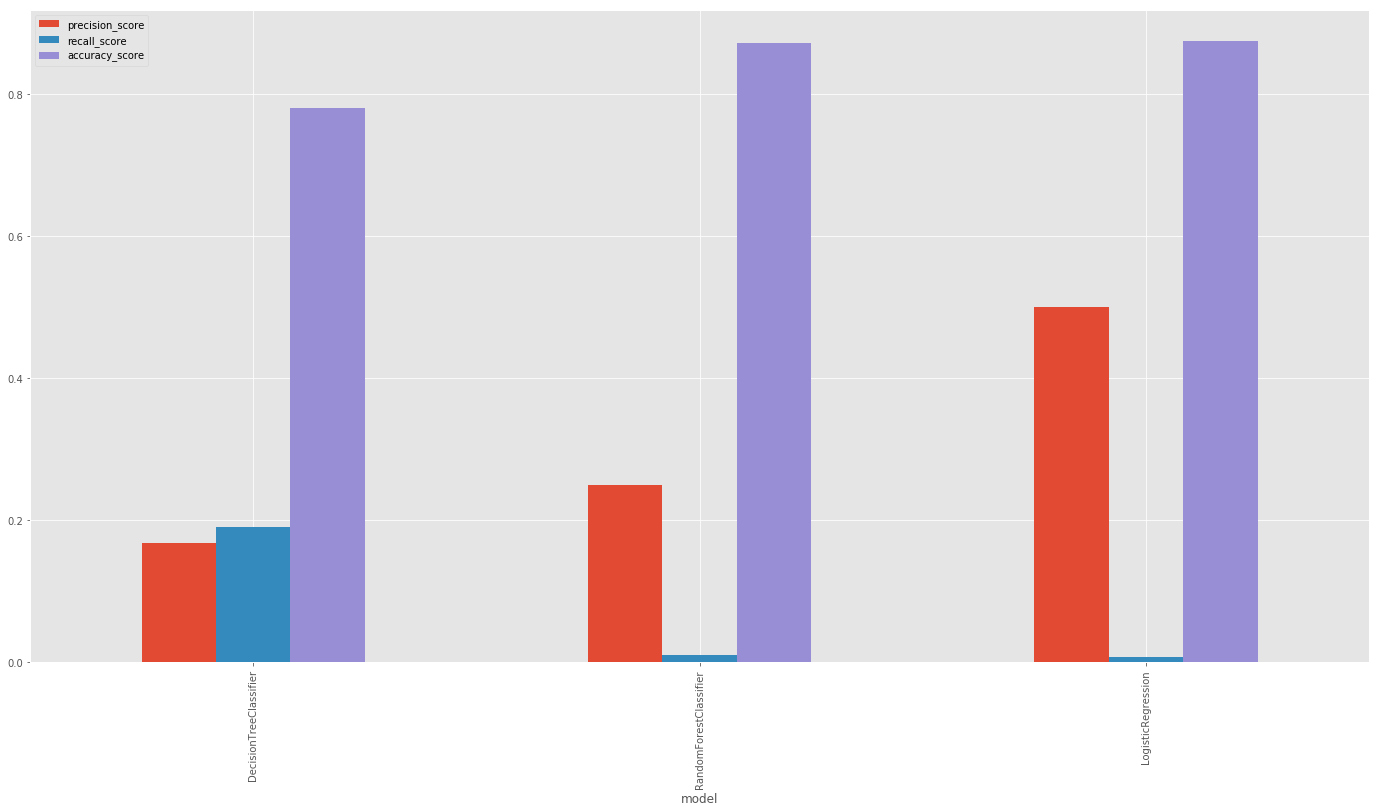

In [45]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

import matplotlib.pyplot as plt
%matplotlib inline

result_prediction = {}
result_prediction['model'] = ['DecisionTreeClassifier','RandomForestClassifier','LogisticRegression',]
result_prediction['precision_score'] = [precision_score(y_test, Y_test_DTC), precision_score(y_test, Y_test_RFC), precision_score(y_test, Y_test_LR),]
result_prediction['recall_score'] = [recall_score(y_test, Y_test_DTC), recall_score(y_test, Y_test_RFC), recall_score(y_test, Y_test_LR),]
result_prediction['accuracy_score'] = [accuracy_score(y_test, Y_test_DTC), accuracy_score(y_test, Y_test_RFC), accuracy_score(y_test, Y_test_LR),]

result_df = pd.DataFrame(result_prediction)
result_df.plot(x='model',kind='bar', stacked=False, figsize = (24,12))

DecisionTreeClassifier 0.5274276010010726
RandomForestClassifier 0.593946639256346
LogisticRegression 0.6501993207007508


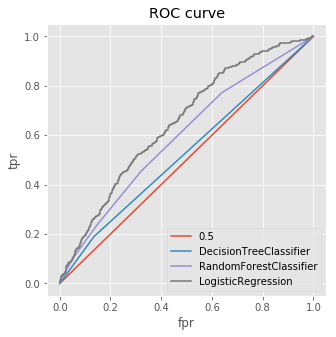

In [46]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve

#настройки
plt.figure(figsize=(5, 5))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')

#0.5
plt.plot([0, 1], [0, 1])

#DecisionTreeClassifier
print('DecisionTreeClassifier', roc_auc_score(y_test, y_test_DTC_proba[:,1]))
fpr, tpr, thresholds = roc_curve(y_test, y_test_DTC_proba[:,1])
plt.plot(fpr, tpr)
#RandomForestClassifier
print('RandomForestClassifier', roc_auc_score(y_test, y_test_RFC_proba[:,1]))
fpr, tpr, thresholds = roc_curve(y_test, y_test_RFC_proba[:,1])
plt.plot(fpr, tpr)
#LogisticRegression
print('LogisticRegression', roc_auc_score(y_test, y_test_LR_proba[:,1]))
fpr, tpr, thresholds = roc_curve(y_test, y_test_LR_proba[:,1])
plt.plot(fpr, tpr)


#легенда
plt.legend(['0.5', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'])

In [47]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

#DecisionTreeClassifier
scores_DTC = cross_val_score(    
    model_DTC,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
)

print('DecisionTreeClassifier', np.mean(scores_DTC), '\n', scores_DTC,'\n')

#RandomForestClassifier
scores_RFC = cross_val_score(
    model_RFC,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
)
print('RandomForestClassifier', np.mean(scores_RFC), '\n', scores_RFC,'\n')

#LogisticRegression
scores_LR = cross_val_score(
    model_LR,
    X_train,
    y_train,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
)
print('LogisticRegression', np.mean(scores_LR), '\n', scores_LR,'\n')

DecisionTreeClassifier 0.5126426832403248 
 [0.50745875 0.51355416 0.52027837 0.50463354 0.51978506 0.51423538
 0.50512685 0.52704991 0.50677362 0.50753119] 

RandomForestClassifier 0.5862892894227222 
 [0.57093727 0.59738592 0.55387597 0.56633192 0.61225335 0.60526779
 0.58142178 0.5751426  0.60467023 0.59560606] 

LogisticRegression 0.6458046813848568 
 [0.67823594 0.5884319  0.6788055  0.63914729 0.66081748 0.66597956
 0.5865222  0.62946524 0.67743316 0.65320856] 



In [48]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# по результатам предыдущего сравнения моделей мы выбираем логистическую регрессию

model_LR.fit(X_train,y_train)

Y_test_LR = model_LR.predict(X_test)
y_test_LR_proba = model_LR.predict_proba(X_test)

print(Y_test_LR)
print(y_test_LR_proba)

[0 0 0 ... 0 0 0]
[[0.56112463 0.43887537]
 [0.84947417 0.15052583]
 [0.90943048 0.09056952]
 ...
 [0.8152965  0.1847035 ]
 [0.94742495 0.05257505]
 [0.79562646 0.20437354]]


LogisticRegression 0.6501993207007508


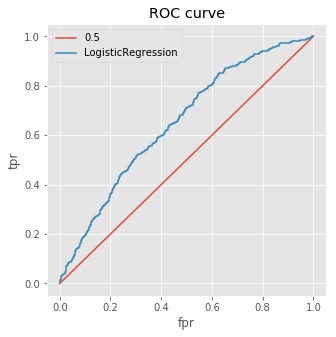

In [49]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

#настройки отображения
plt.figure(figsize=(5, 5))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')

#0.5
plt.plot([0, 1], [0, 1])

print('LogisticRegression', roc_auc_score(y_test, y_test_LR_proba[:,1]))
fpr, tpr, thresholds = roc_curve(y_test, y_test_LR_proba[:,1])
plt.plot(fpr, tpr)


#легенда
plt.legend(['0.5', 'LogisticRegression'])

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)